In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.costs = []

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def initialize_parameters(self, num_features, num_classes):
        # Initialize weights with random values
        self.weights = np.random.rand(num_features, num_classes)*0.09
        self.bias = -1

    def compute_cost(self, h, y):
        m = len(y)
        cost = (-1 / m) * np.sum(np.sum(y * np.log(h), axis=1))
        return cost

    def gradient_descent(self, X, y):
        m = len(y)
        h = self.softmax(np.dot(X, self.weights) + self.bias)
        dw = (1 / m) * np.dot(X.T, (h - y))
        db = (1 / m) * np.sum(h - y, axis=0, keepdims=True)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db


    def one_hot_encode(self, y, num_classes):
        m = len(y)
        y_encoded = np.zeros((m, num_classes))
        for i in range(m):
            y_encoded[i, int(y[i])] = 1
        return y_encoded


    def fit(self, X, y):
        num_features = X.shape[1]
        #print(num_features)
        num_classes = len(np.unique(y))
        self.initialize_parameters(num_features, num_classes)

        y_encoded = self.one_hot_encode(y, num_classes)

        for i in range(self.num_iterations):
            h = self.softmax(np.dot(X, self.weights) + self.bias)
            cost = self.compute_cost(h, y_encoded)
            self.gradient_descent(X, y_encoded)

            if i % 100 == 0:
                self.costs.append(cost)
                #print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        h = self.softmax(np.dot(X, self.weights) + self.bias)
        predictions = np.argmax(h, axis=1)
        return predictions


    def feature_scaling(self, X):
         mean = np.mean(X, axis=0)
         std = np.std(X, axis=0)
         X_scaled = (X - mean) / std
         return X_scaled

    def plot_costs(self):
        plt.plot(range(0, self.num_iterations, 100), self.costs, marker='o')
        plt.title('Cost History')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()

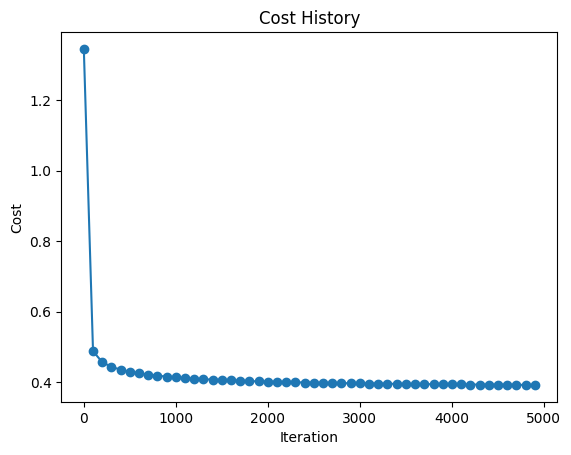

Accuracy: 0.8368055555555556


In [ ]:
#load data from a CSV file
def load_data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    return data

raw_data = load_data('/content/drive/MyDrive/car_evaluation.csv')

# Convert the loaded data to a numpy array
data = np.array(raw_data)

# Extract features and target variable
X = data[:, :-1]
y = data[:, -1]

# Encode categorical variables
X_encoded = np.zeros_like(X, dtype=int)

# Specify the order for certain features
order_for_buying_maint = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
order_for_doors = {'5more': 3, '4': 2, '3': 1, '2': 0}
order_for_persons = {'more': 2, '4': 1, '2': 0}
order_for_lug_boot = {'big': 2, 'med': 1, 'small': 0}
order_for_safety = {'high': 2, 'med': 1, 'low': 0}

# Encode features
for i in range(X.shape[1]):
    unique_values = np.unique(X[:, i])

    # Check if the feature requires a specific order
    if i == 0 or i == 1:  # buying and maint
        for j, value in enumerate(order_for_buying_maint):
            X_encoded[:, i][X[:, i] == value] = order_for_buying_maint[value]
    elif i == 2:  # doors
        for j, value in enumerate(order_for_doors):
            X_encoded[:, i][X[:, i] == value] = order_for_doors[value]
    elif i == 3:  # persons
        for j, value in enumerate(order_for_persons):
            X_encoded[:, i][X[:, i] == value] = order_for_persons[value]
    elif i == 4:  # lug_boot
        for j, value in enumerate(order_for_lug_boot):
            X_encoded[:, i][X[:, i] == value] = order_for_lug_boot[value]
    elif i == 5:  # safety
        for j, value in enumerate(order_for_safety):
            X_encoded[:, i][X[:, i] == value] = order_for_safety[value]
    else:
        for j, value in enumerate(unique_values):
            X_encoded[:, i][X[:, i] == value] = j

# print(X_encoded[0:5]);
# Map string labels to integers for the target variable
class_mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
y_encoded = np.array([class_mapping[label] for label in y])

# Create and train the logistic regression model
model = LogisticRegression(learning_rate=0.56, num_iterations=5000)

# Feature scaling
#X_scaled = model.feature_scaling(X_encoded)

# Train the model on the entire dataset
model.fit(X_encoded, y_encoded)

model.plot_costs()

# Make predictions on the set
predictions = model.predict(X_encoded)
# print(predictions[1200:1300])
# Evaluate the model on set
accuracy = np.mean(predictions == y_encoded)
print(f"Accuracy: {accuracy}")